In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [17]:
pd.set_option('display.precision', 3)
sns.set(style="whitegrid", palette="pastel")

In [18]:
url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv"
data = pd.read_csv(url)

In [19]:
print("Aperçu du jeu de données :")
display(data.head())

Aperçu du jeu de données :


Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4

In [20]:
print("\nInformations sur les variables :")
display(data.info())


Informations sur les variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
Smoker    1314 non-null object
Status    1314 non-null object
Age       1314 non-null float64
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


None

In [21]:
print("\nValeurs uniques dans chaque variable :")
for col in data.columns:
    print(f"{col}: {data[col].unique()}")


Valeurs uniques dans chaque variable :
Smoker: ['Yes' 'No']
Status: ['Alive' 'Dead']
Age: [21.  19.3 57.5 47.1 81.4 36.8 23.8 24.8 49.5 30.  66.  49.2 58.4 60.6
 25.1 43.5 27.1 58.3 65.7 73.2 38.3 33.4 62.3 18.  56.2 59.2 25.8 36.9
 20.2 34.6 51.9 49.9 19.4 56.9 46.7 44.4 29.5 33.  35.6 39.1 69.7 35.7
 75.8 25.3 83.  44.3 18.5 37.5 22.1 82.8 45.  73.3 39.  28.4 73.7 40.1
 51.2 22.9 41.9 58.1 37.3 41.7 36.3 80.7 38.6 27.9 47.6 77.6 26.2 45.4
 62.4 62.5 39.5 27.6 31.4 85.  18.9 35.3 25.4 72.8 27.3 55.9 32.8 53.6
 48.  56.1 18.3 62.8 18.6 46.3 36.  55.5 76.5 61.  26.8 70.5 81.8 32.5
 23.  83.7 45.9 59.9 66.5 47.5 89.3 57.2 21.3 34.  59.5 50.1 30.6 63.8
 27.4 22.5 24.2 56.8 28.9 87.8 88.4 33.7 63.6 71.7 48.5 82.  40.8 31.3
 24.4 32.2 53.1 26.3 41.  86.8 49.7 50.5 63.5 33.1 30.7 59.4 67.2 20.7
 41.6 37.7 89.7 45.2 55.4 44.8 76.7 48.4 82.7 27.  30.9 82.9 40.5 26.5
 29.9 75.  66.3 87.  79.5 51.7 78.2 80.  62.9 78.3 49.8 36.5 60.1 62.
 19.  87.6 24.3 22.2 68.4 89.2 44.5 43.3 57.4 45.6 18.1 63

In [28]:
table_smoking = pd.crosstab(data['smoker'], data['outcome'])
print("Tableau de contingence (nombre de femmes vivantes et décédées) :")
display(table_smoking)

KeyError: 'smoker'

In [29]:
print("Colonnes du DataFrame :", list(data.columns))

Colonnes du DataFrame : ['Smoker', 'Status', 'Age']


In [30]:
candidates_smoker = [c for c in data.columns if any(k in c.lower() for k in ['smok', 'tabag', 'cigs', 'cig'])]
candidates_outcome = [c for c in data.columns if any(k in c.lower() for k in ['outcome', 'status', 'dead', 'alive', 'death'])]
candidates_age = [c for c in data.columns if 'age' in c.lower()]

In [31]:
print("\nCandidats possibles pour 'smoker' :", candidates_smoker)
print("Candidats possibles pour 'outcome' :", candidates_outcome)
print("Candidats possibles pour 'age' :", candidates_age)


Candidats possibles pour 'smoker' : ['Smoker']
Candidats possibles pour 'outcome' : ['Status']
Candidats possibles pour 'age' : ['Age']


In [33]:
if len(candidates_smoker) == 0 or len(candidates_outcome) == 0 or len(candidates_age) == 0:
    raise ValueError("Impossible de détecter automatiquement les colonnes smoker/outcome/age. "
                     "Regardez la liste des colonnes ci-dessus et remplacez manuellement les noms dans le code.")
smoker_col = candidates_smoker[0]
outcome_col = candidates_outcome[0]
age_col = candidates_age[0]

print(f"\nUtilisation de : smoker_col = '{smoker_col}', outcome_col = '{outcome_col}', age_col = '{age_col}'")


Utilisation de : smoker_col = 'Smoker', outcome_col = 'Status', age_col = 'Age'


In [34]:
print("\nValeurs uniques (extrait) :")
for col in [smoker_col, outcome_col, age_col]:
    try:
        print(f" - {col}: {pd.unique(data[col])[:20]}")
    except Exception as e:
        print(f" - {col}: erreur lors de l'accès -> {e}")



Valeurs uniques (extrait) :
 - Smoker: ['Yes' 'No']
 - Status: ['Alive' 'Dead']
 - Age: [21.  19.3 57.5 47.1 81.4 36.8 23.8 24.8 49.5 30.  66.  49.2 58.4 60.6
 25.1 43.5 27.1 58.3 65.7 73.2]


In [35]:
def map_smoker(val):
    if pd.isna(val): 
        return np.nan
    s = str(val).strip().lower()
    # cas fréquents
    if s in ('yes','y','current','smoker','smokes','smoking','yes (current)'):
        return 'Yes'
    if s in ('no','n','never','non','never smoked','never smoked'):
        return 'No'
    # si la modalité contient 'never' ou 'no'
    if 'never' in s or 'no' in s:
        return 'No'
    if 'current' in s or 'smok' in s or 'yes' in s:
        return 'Yes'
    return s.capitalize()


In [36]:
def map_outcome(val):
    if pd.isna(val):
        return np.nan
    s = str(val).strip().lower()
    if any(k in s for k in ['dead','died','death','deceased']):
        return 'Dead'
    if any(k in s for k in ['alive','living','alive']):
        return 'Alive'
    # parfois on a 0/1
    if s in ('1', '0'):
        return 'Dead' if s == '1' else 'Alive'
    return s.capitalize()

In [37]:
data['smoker_std'] = data[smoker_col].apply(map_smoker)
data['outcome_std'] = data[outcome_col].apply(map_outcome)

In [38]:
data['age_num'] = pd.to_numeric(data[age_col], errors='coerce')

In [39]:
print("\nAprès standardisation — exemples :")
display(data[[smoker_col, 'smoker_std', outcome_col, 'outcome_std', age_col, 'age_num']].head())



Après standardisation — exemples :


Smoker smoker_std Status outcome_std   Age  age_num
0    Yes        Yes  Alive       Alive  21.0     21.0
1    Yes        Yes  Alive       Alive  19.3     19.3
2     No         No   Dead        Dead  57.5     57.5
3     No         No  Alive       Alive  47.1     47.1
4    Yes        Yes  Alive       Alive  81.4     81.4

In [40]:
print("\nComptes des valeurs manquantes :")
display(data[['smoker_std','outcome_std','age_num']].isna().sum())


Comptes des valeurs manquantes :


smoker_std     0
outcome_std    0
age_num        0
dtype: int64

In [41]:
data_filtered = data[data['smoker_std'].isin(['Yes','No']) & data['outcome_std'].isin(['Alive','Dead']) & data['age_num'].notna()].copy()
print(f"\nTaille après filtrage (Yes/No, Alive/Dead, age notna) : {len(data_filtered)} lignes")



Taille après filtrage (Yes/No, Alive/Dead, age notna) : 1314 lignes


In [42]:
table_smoking = pd.crosstab(data_filtered['smoker_std'], data_filtered['outcome_std'])
table_smoking['total'] = table_smoking.sum(axis=1)
table_smoking['taux_mortalite'] = table_smoking.get('Dead', 0) / table_smoking['total']
print("\nTableau de contingence (nombre de femmes vivantes et décédées) :")
display(table_smoking)


Tableau de contingence (nombre de femmes vivantes et décédées) :


outcome_std  Alive  Dead  total  taux_mortalite
smoker_std                                     
No             502   230    732           0.314
Yes            443   139    582           0.239

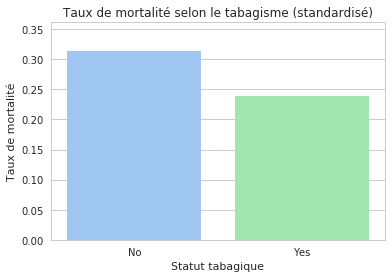

In [43]:
plt.figure(figsize=(6,4))
sns.barplot(x=table_smoking.index, y=table_smoking['taux_mortalite'].values)
plt.title("Taux de mortalité selon le tabagisme (standardisé)")
plt.ylabel("Taux de mortalité")
plt.xlabel("Statut tabagique")
plt.ylim(0, table_smoking['taux_mortalite'].max()*1.15)
plt.show()

In [44]:
bins = [18, 34, 54, 64, 120]
labels = ['18-34', '35-54', '55-64', '65+']
data_filtered['age_class'] = pd.cut(data_filtered['age_num'], bins=bins, labels=labels, right=True)


In [45]:
table_age = data_filtered.groupby(['age_class','smoker_std','outcome_std']).size().unstack(fill_value=0)
table_age['total'] = table_age.sum(axis=1)
table_age['taux_mortalite'] = table_age.get('Dead', 0) / table_age['total']
print("\nTableau par classe d'âge et tabagisme :")
display(table_age)


Tableau par classe d'âge et tabagisme :


outcome_std           Alive  Dead  total  taux_mortalite
age_class smoker_std                                    
18-34     No            212     6    218           0.028
          Yes           172     5    177           0.028
35-54     No            180    19    199           0.095
          Yes           196    41    237           0.173
55-64     No             81    40    121           0.331
          Yes            64    51    115           0.443
65+       No             28   165    193           0.855
          Yes             7    42     49           0.857

In [46]:
plt.figure(figsize=(8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


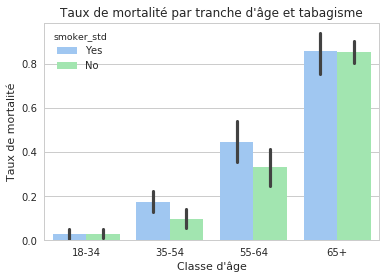

In [47]:
data_filtered['dead_bin'] = (data_filtered['outcome_std']=='Dead').astype(int)
sns.barplot(data=data_filtered, x='age_class', y='dead_bin', hue='smoker_std', estimator=np.mean)
plt.title("Taux de mortalité par tranche d'âge et tabagisme")
plt.ylabel("Taux de mortalité")
plt.xlabel("Classe d'âge")
plt.ylim(0, None)
plt.show()

In [48]:
import statsmodels.formula.api as smf
data_filtered['Death'] = data_filtered['dead_bin']

In [49]:
model_age = smf.logit("Death ~ age_num", data=data_filtered).fit(disp=False)
print("\nRésumé du modèle : Death ~ age")
print(model_age.summary())


Résumé du modèle : Death ~ age
                           Logit Regression Results                           
Dep. Variable:                  Death   No. Observations:                 1314
Model:                          Logit   Df Residuals:                     1312
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Nov 2025   Pseudo R-squ.:                  0.3560
Time:                        09:38:47   Log-Likelihood:                -502.39
converged:                       True   LL-Null:                       -780.16
                                        LLR p-value:                7.883e-123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1045      0.321    -18.992      0.000      -6.735      -5.475
age_num        0.0977      0.006     17.578      0.000       0.087       0.109


In [50]:
model_age_smoke = smf.logit("Death ~ age_num + C(smoker_std)", data=data_filtered).fit(disp=False)
print("\nRésumé du modèle : Death ~ age + tabagisme (C(smoker_std))")
print(model_age_smoke.summary())


Résumé du modèle : Death ~ age + tabagisme (C(smoker_std))
                           Logit Regression Results                           
Dep. Variable:                  Death   No. Observations:                 1314
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Nov 2025   Pseudo R-squ.:                  0.3579
Time:                        09:38:54   Log-Likelihood:                -500.95
converged:                       True   LL-Null:                       -780.16
                                        LLR p-value:                5.534e-122
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.3519      0.360    -17.637      0.000      -7.058      -5.646
C(smoker_std)[T.Yes]     0.2787      0.16

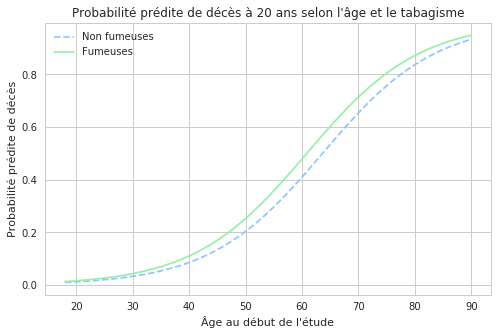


Interprétation rapide :
- Vérifiez le tableau de contingence : si le taux global semble plus bas chez les fumeuses,
  c'est probablement parce que les fumeuses sont en moyenne plus jeunes (paradoxe de Simpson).
- Après ajustement sur l'âge (régression logistique), le tabagisme montre en général un effet de risque positif.


In [53]:
age_range = np.linspace(data_filtered['age_num'].min(), data_filtered['age_num'].max(), 100)
pred_df_no = pd.DataFrame({'age_num': age_range, 'smoker_std':'No'})
pred_df_yes = pd.DataFrame({'age_num': age_range, 'smoker_std':'Yes'})

pred_no = model_age_smoke.predict(pred_df_no)
pred_yes = model_age_smoke.predict(pred_df_yes)

plt.figure(figsize=(8,5))
plt.plot(age_range, pred_no, label='Non fumeuses', linestyle='--')
plt.plot(age_range, pred_yes, label='Fumeuses', linestyle='-')
plt.title("Probabilité prédite de décès à 20 ans selon l'âge et le tabagisme")
plt.xlabel("Âge au début de l'étude")
plt.ylabel("Probabilité prédite de décès")
plt.legend()
plt.show()

print("\nInterprétation rapide :")
print("- Vérifiez le tableau de contingence : si le taux global semble plus bas chez les fumeuses,")
print("  c'est probablement parce que les fumeuses sont en moyenne plus jeunes (paradoxe de Simpson).")
print("- Après ajustement sur l'âge (régression logistique), le tabagisme montre en général un effet de risque positif.")